In [10]:
import matplotlib.pyplot as plt

%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
mpl.rcParams['legend.fontsize'] = 10

import numpy as np

<IPython.core.display.Javascript object>


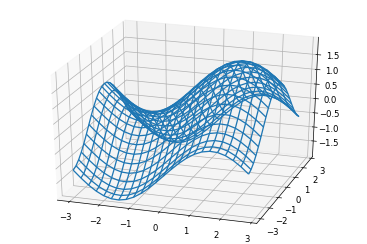

In [11]:

fig = plt.figure()
x = np.arange(-3, 3, 0.25)
y = np.arange(-3, 3, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(X)+ np.cos(Y)

ax = Axes3D(fig)
ax.plot_wireframe(X,Y,Z)
plt.show()

<IPython.core.display.Javascript object>


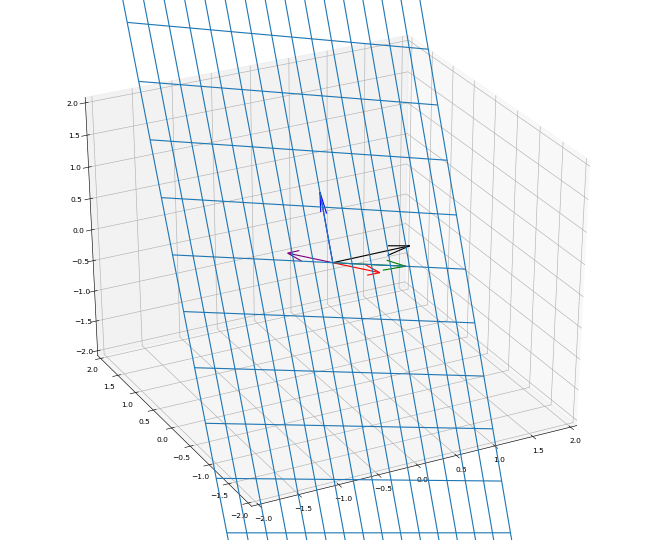

0.0 0.0 0.0


In [370]:
normal = np.array([1,-9,3])

plane = lambda x, y: -(normal[0] * x + normal[1] * y) / normal[2]

fig = plt.figure(figsize=(12,10))
x = np.arange(-2, 2, 0.25)
y = np.arange(-2, 2, 0.25)
X, Y = np.meshgrid(x, y)
Z = plane(X,Y)

ax = Axes3D(fig)

ax.set_xlim(-2, 2) 
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

ax.plot_wireframe(X,Y,Z)
ax.quiver(0,0,0,normal[0], normal[1], normal[2],  color='red', normalize=True)
ax.quiver(0,0,0,0, 1, plane(0,1),  color='blue', normalize=True)
ax.quiver(0,0,0,1, 0, plane(1,0),  color='green', normalize=True)

u = np.array([0, 1, plane(0,1)])
v = -np.cross(normal, u)

basis_vector = np.c_[normal, u, v]

A = np.linalg.inv(basis_vector)


transformed = np.dot(A, normal.T)

ax.quiver(0, 0, 0, transformed[0],transformed[1],transformed[2],  color='black', normalize=True)

cross = np.cross(u, v)

ax.quiver(0,0,0,cross[0], cross[1], cross[2],  color='purple', normalize=True)

print(np.dot(normal, u), np.dot(normal, v), np.dot(u, v))

plt.show()


In [341]:
def normalize(v):
    return v / np.linalg.norm(v)

def cos_sim(a,b):
    return np.dot(a, b) / ( np.linalg.norm(a) * np.linalg.norm(b) )

In [348]:
np.set_printoptions(suppress=True)
np.set_printoptions(precision=4)

<IPython.core.display.Javascript object>


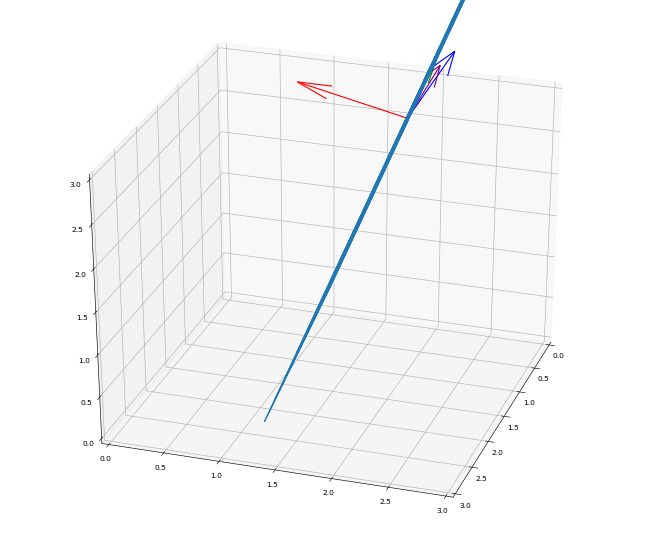

-0.8386278693775346 0.0 -8.881784197001252e-16
-0.8386278693775346


In [369]:
normal = normalize(np.array([1,-9,3]))
point = np.array([1, 2, 3])


#d = -point.dot(normal)
#plane = lambda x, y: (-normal[0] * x - normal[1] * y - d) / normal[2]
plane = lambda x, y: -(normal[0] * (x - point[0]) + normal[1] * (y - point[1])) / normal[2] + point[2]

X, Y = np.meshgrid(np.arange(-0, 2, 0.1), np.arange(1, 3, 0.1))
Z = plane(X,Y)

fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)

ax.set_xlim(-0, 3) 
ax.set_ylim(-0, 3)
ax.set_zlim(-0, 3)

ax.plot_wireframe(X,Y,Z)

u_x = 0 + point[0]
u_y = 1 + point[1]

u = np.array([u_x, u_y, plane(u_x, u_y)])
v = np.cross(normal, u)


ax.quiver(point[0], point[1], point[2], normal[0], normal[1], normal[2],  color='red', normalize=True)
ax.quiver(point[0], point[1], point[2], u[0], u[1], u[2], color='blue', normalize=True)
ax.quiver(point[0], point[1], point[2], v[0], v[1], v[2],  color='green', normalize=True)


ax.quiver(point[0], point[1], point[2], 5, 5, plane(5, 5),  color='purple', normalize=True)

basis_vector = np.c_[normal, u, v]

A = np.linalg.inv(basis_vector)


transformed = np.dot(A, normal.T)

#ax.quiver(0, 0, 0, transformed[0],transformed[1],transformed[2],  color='black', normalize=True)

cross = np.cross(u, v)

#ax.quiver(0,0,0,cross[0], cross[1], cross[2],  color='purple', normalize=True)

print(np.dot(normal, u), np.dot(normal, v), np.dot(u, v))
print(np.dot(normal, [4, 5, plane(4, 5)]))

plt.show()


In [119]:
smpl = np.random.randint(low=-1e+2, high=1e+2, size=(10, 3)) / 1e+2
smpl

array([[-0.23, -0.27, -0.76],
       [ 0.  , -0.49, -0.09],
       [-0.79, -0.21,  0.13],
       [-0.93, -0.21, -0.67],
       [-0.21, -0.64, -0.58],
       [-0.62,  0.91,  0.89],
       [ 0.04, -0.51, -0.4 ],
       [-0.16,  0.48, -0.74],
       [-0.41, -0.96, -0.2 ],
       [-0.2 ,  0.11,  0.19]])

In [89]:
@jit(nopython=True)
def make4class(struct, idx0, idx1):
    
    coo0 = struct[idx0]
    coo1 = struct[idx1]
    norm0 = np.linalg.norm(coo0)
    norm1 = np.linalg.norm(coo1)
    
    if norm1 < norm0:
        tmp = coo0
        coo0  = coo1
        coo1 = tmp
    
    n = (coo1 - coo0) / 2
    n_unit = n / np.linalg.norm(n)
    
    vec0 = coo0 + n
    
    plane = lambda x, y: -(n_unit[0] * (x - vec0[0]) + n_unit[1] * (y - vec0[1])) * (1/n_unit[2]) + vec0[2]
    
    basis_vector = np.array(
        [n_unit[0], n_unit[1], n_unit[2], 
         0, 1, plane(0,1), 
         1, 0, plane(1,0)]
    ).reshape((3,3)).T
    
    transform = np.linalg.inv(basis_vector)
    
    return np.dot(transform, struct.T)

In [269]:
def two_point_standardization(struct, idx0, idx1):
    
    coo0 = struct[idx0]
    coo1 = struct[idx1]
    
    if np.linalg.norm(coo1) < np.linalg.norm(coo0):
        
        tmp = coo0
        coo0  = coo1
        coo1 = tmp
    
    n = (coo1 - coo0) / 2
    n_unit = n / np.linalg.norm(n)
    
    vec0 = coo0 + n
    
    # Plane Equation
    d = -vec0.dot(n_unit)
    z = lambda x, y: (-n_unit[0] * x - n_unit[1] * y - d) / n_unit[2]
        
    # make orthonormal basis on plane
    u = np.array([1, 0, z(1, 0)])
    v = np.array([0, 1, z(0, 1)])
    
    u_unit = u / np.linalg.norm(u)
    v_unit = v / np.linalg.norm(v)
    
    # basis_conversion
    basis_vector = np.c_[n_unit, u_unit, v_unit]
    
    transform = np.linalg.inv(basis_vector)
    
    return np.dot(transform, struct.T)

two_point_standardization(smpl, 3,6).T

array([[ 0.43090563,  0.90958622, -0.46299467],
       [ 0.07906472,  0.39560068, -0.60380166],
       [ 0.84224317, -0.06712446, -0.53067606],
       [ 1.15157761,  0.72192182, -0.63472553],
       [ 0.4196651 ,  0.9617313 , -0.89506394],
       [ 0.36938549, -1.51177942,  0.9477073 ],
       [ 0.10095874,  0.72192182, -0.63472553],
       [ 0.25883838,  0.42800193,  0.47836295],
       [ 0.59667626,  0.76353602, -1.33155591],
       [ 0.16145823, -0.27601441,  0.07526809]])

<IPython.core.display.Javascript object>


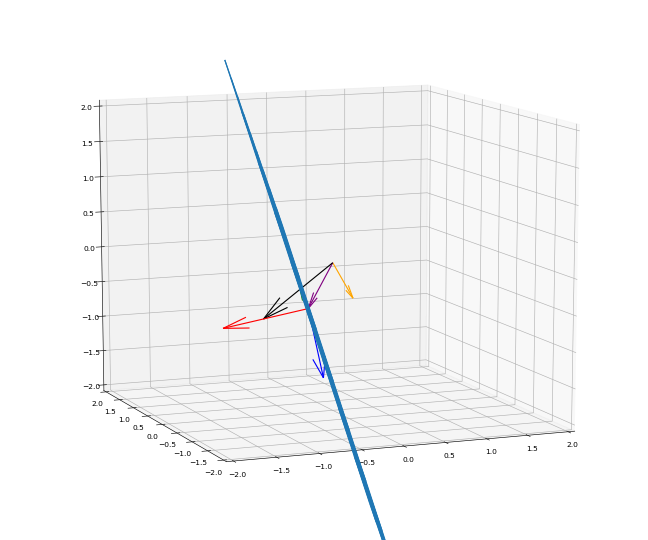

0.23404999999999992 -1.3877787807814457e-17 0.0


In [307]:
def two_point_standardization_with_plot(struct, idx0, idx1):
    
    fig = plt.figure(figsize=(12,10))
    
    X, Y = np.meshgrid(np.arange(-1, 1, 0.2), np.arange(-1, 1, 0.2))
    
    coo0 = struct[idx0]
    coo1 = struct[idx1]
    
    if np.linalg.norm(coo1) < np.linalg.norm(coo0):
        
        tmp = coo0
        coo0  = coo1
        coo1 = tmp
    
    normal = (coo1 - coo0) / 2
    
    normal_unit = normal / np.linalg.norm(normal)
    
    vec0 = coo0 + normal
    
    # Plane Equation
    d = -vec0.dot(normal)
    plane = lambda x, y: (-normal[0] * x - normal[1] * y - d) / normal[2]
    
    ax = Axes3D(fig)
    
    ax.set_xlim(-2, 2) 
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)

    Z = plane(X,Y)
    ax.plot_wireframe(X,Y,Z)
    
    ax.quiver(0, 0, 0, coo0[0], coo0[1], coo0[2], color='orange') # coo0
    ax.quiver(0, 0, 0, coo1[0], coo1[1], coo1[2], color='black') # coo1   
    ax.quiver(0, 0, 0, vec0[0], vec0[1], vec0[2], color='purple') # separate point
    ax.quiver(vec0[0], vec0[1], vec0[2], normal_unit[0], normal_unit[1], normal_unit[2], color='red') # normal vector
    
    # make orthonormal basis on plane
    u = np.array([1, 0, plane(1, 0)])
    v = np.cross(u, normal)
    
    u_unit = u / np.linalg.norm(u)
    v_unit = v / np.linalg.norm(v)

    ax.quiver(vec0[0], vec0[1], vec0[2], u_unit[0], u_unit[1], u_unit[2], color='blue')
    ax.quiver(vec0[0], vec0[1], vec0[2], v_unit[0], v_unit[1], v_unit[2], color='green')
    
    print(np.dot(normal, u), np.dot(normal, v), np.dot(u, v))
    
    # basis_conversion
    #basis_vector = np.c_[n_unit, u_unit, v_unit]
    
    #transform = np.linalg.inv(basis_vector)
    
    #return np.dot(transform, struct.T)
    
two_point_standardization_with_plot(smpl, 3,6)

In [78]:
np.arange(9).reshape((3,3), order='F')

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])